<a href="https://colab.research.google.com/github/fedebaldasso/Data-Science/blob/main/AlgoritmoClasificaci%C3%B3nII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar paquetes importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler



In [ ]:
#adquisicion de datos
df_sal = pd.read_csv('ds_salaries.csv')
del df_sal['Unnamed: 0']
df_sal.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Descripción de variables

**work_year:**	El año en que se pagó el salario.
**experience_level:**	El nivel de experiencia en el puesto durante el año con los siguientes valores posibles: EN Entry-level/Junior MI Mid-level/Intermediate SE Senior-level/Experto EX Executive-level
**employment_type:**	El tipo de empleo para el puesto: PT Tiempo parcial FT Tiempo completo CT Contrato FL Freelance
**job_title:**	Rol trabajado durante el año.
**salary:**	El monto total del salario bruto pagado.
**salary_currency:**	La moneda del salario pagado como un código de moneda ISO 4217.
**salary in usd:**	El salario en USD (tasa de cambio dividida por la tasa promedio de USD para el año respectivo a través de fxdata.foorilla.com).
**employee_residence:**	El país de residencia principal del empleado durante el año laboral como código de país ISO 3166.
**remote_ratio:**	La cantidad total de trabajo realizado de forma remota, los valores posibles son los siguientes: 0 Sin trabajo remoto (menos del 20 %) 50 Parcialmente remoto 100 Totalmente remoto (más del 80 %)
**company_location:**	El país de la oficina principal del empleador o sucursal contratante como un código de país ISO 3166.
**company_size:**	Número promedio de personas que trabajaron para la empresa durante el año: S menos de 50 empleados (pequeño) M 50 a 250 empleados (mediano) L más de 250 empleados (grande)\

In [ ]:
#chequeo de datos 
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


No se registran datos desconocidos 

In [ ]:
#chequeo de nulos
df_sal.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No se registran datos nulos

In [ ]:
df_sal['work_year'] = pd.to_datetime(df_sal['work_year'], format='%Y').dt.year #Trabajo con las fechas en año solamente  

In [ ]:
#variables categoricas 
cat_columns = df_sal.select_dtypes(include = ["object"]).columns

In [ ]:
cat_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

Si retomamos a analisis anteriores, salary es el salario total basandose en la moneda de pago del salario. Si nuestro target es salary in usd decidimos eliminar tanto la columna salary_currency y salary para solamente quedarnos con el salario en una unica moneda (USD). 

In [ ]:
df_sal.drop([ 'salary','salary_currency'], axis = 1, inplace=True) 


KeyError: ignored

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#generate one hot encoder class
encoder = OneHotEncoder(handle_unknown='ignore', #ponemos ignore para poder ommitir cuando puede pasar que no exista los mismos valores 
                        sparse=False) # generarlo como. matrix para poder generar las columnas adecuadas

#entrenamiento para generar el preprocesamiento one hot encoding para las variables indicadas
encoder.fit(df_sal[['company_size', 'experience_level']])

#transformo en train datasets en base a la clase generada
cat_encoding = pd.DataFrame(encoder.transform(df_train[['company_size', 'experience_level']]), columns=encoder.get_feature_names(['company_size', 'experience_level']))
cat_encoding.head()

In [ ]:
#transformaciones

#borrado de la variable object para el entrenamiento
df_sal_f = df_sal
df_sal_f.drop(['experience_level', 'employment_type' ,'job_title','salary_currency',
       'employee_residence', 'company_location', 'company_size'], axis = 1, inplace=True) #, 'salary'

In [ ]:
df_sal_f.head()

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50


## Comienzo de entrenamiento 



In [ ]:
#primero spliteamos los datos para entrenar y el target
X = df_sal_f.drop("salary_in_usd", axis=1)  #Selecciono mi X eliminando mi variable target
y = df_sal_f["salary_in_usd"] #Selecciono mi target que es Salario en USD


In [ ]:
#spliteo de train y test 
#Divido mi data set para poder obtener un conjunto para entrenar y otro para validarlo
#Obtengo un 20% de mi conjunto de datos para testearlo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
X_test

,work_year,salary,remote_ratio
563,2022,140250,100
289,2022,135000,100
76,2021,100000,100
78,2021,270000,100
182,2021,22000,0
...,...,...,...
249,2021,170000,100
365,2022,138600,100
453,2022,120000,100
548,2022,99050,100


In [ ]:
#transformacion numerica para normalizar mis datos
from sklearn.preprocessing import MinMaxScaler

numeric_encoder = MinMaxScaler() #Genero una variable de la normalizacion
numeric_encoder.fit(X_train)
x_minmax = numeric_encoder.transform(X_train)
#x_minmax = numeric_encoder.fit_transform(X_train)
pd.DataFrame(x_minmax)

,0,1,2
0,0.0,0.011004,0.5
1,0.5,0.006457,0.5
2,1.0,0.012810,1.0
3,1.0,0.013505,1.0
4,0.5,0.003128,1.0
...,...,...,...
480,0.0,0.003001,0.5
481,0.5,0.021008,1.0
482,0.5,0.006230,1.0
483,1.0,0.006002,1.0


In [ ]:
# crear el clasificador para poder llevar a cabo el entrenamiento
classifier = RandomForestRegressor(n_estimators=100) #Fijo 100 como numero de arboles a realizar 

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(x_minmax, y_train)

#El modelo queda grabado en la variable classifier

RandomForestRegressor()

## Prediccion

In [ ]:
#trasnformao test dataset con las trasnfomracion del entrenamiento
x_test_encoder = numeric_encoder.transform(X_test)
y_pred = classifier.predict(x_test_encoder) #Obtengo todos los valores del conjunto como prediccion 

In [ ]:
X_test['pred'] = y_pred
X_test['target'] = y_test
X_test.head()  #Agrego dos columnas al DF una para prediccion y otra para target

,work_year,salary,remote_ratio,pred,target
563,2022,140250,100,140412.580000,140250
289,2022,135000,100,135000.000000,135000
76,2021,100000,100,99782.711277,100000
78,2021,270000,100,266461.580000,270000
182,2021,22000,0,23218.530000,26005


Se observa que la prediccion es similar al target 

##Metricas


In [ ]:
#Evaluo resultados en esta instancia
r2_score(y_test,y_pred) 

0.5028282646152462

El r2 score toma valores entre -1 y +1. Nuestro r2 score es del 50% aproximadamente

In [ ]:
#Observo cuales son las columnas mas importantes dentro del df para resolver el problema
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
1,salary,0.912723
2,remote_ratio,0.044255
0,work_year,0.043022


Como se observa la columna Salary presenta una importancia del 91%, el inconveniente con esto es que es muy dependiente de esta columna y si retomamos a analisis anteriores, salary es el salario total basandose en la moneda de pago del salario. Si nuestro target es salary in usd decidimos eliminar tanto la columna salary_currency y salary para solamente quedarnos con el salario en una unica moneda (USD). 

In [ ]:
#Vuelvo a correr el modelo eliminando salary
#borrado de la variable object para el entrenamiento + salary
df_sal_f.drop([ 'salary'], axis = 1, inplace=True) 


In [ ]:
df_sal_f.head() #df sin la variable salary

,work_year,salary_in_usd,remote_ratio
0,2020,79833,0
1,2020,260000,0
2,2020,109024,50
3,2020,20000,0
4,2020,150000,50


In [ ]:
#Repito los pasos anteriores con la nueva modificacion

X = df_sal_f.drop("salary_in_usd", axis=1)  
y = df_sal_f["salary_in_usd"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
numeric_encoder = MinMaxScaler() 
numeric_encoder.fit(X_train)
x_minmax = numeric_encoder.transform(X_train)

pd.DataFrame(x_minmax)

classifier = RandomForestRegressor(n_estimators=100)  


classifier.fit(x_minmax, y_train)
x_test_encoder = numeric_encoder.transform(X_test)
y_pred = classifier.predict(x_test_encoder)
X_test['pred'] = y_pred
X_test['target'] = y_test
X_test.head() 



,work_year,remote_ratio,pred,target
563,2022,100,131877.854972,140250
289,2022,100,131877.854972,135000
76,2021,100,114363.197017,100000
78,2021,100,114363.197017,270000
182,2021,0,110232.984757,26005


Ahora las predicciones no se acercan tanto al target

In [ ]:
#Evaluo resultados en esta instancia
r2_score(y_test,y_pred) 

0.013925326869111299

Bajamos el resultado de un 50% a un 1.3%

In [ ]:
#Nuevamente Observo cuales son las columnas mas importantes dentro del df para resolver el problema
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

feature_importances_df

,feature,importance
0,work_year,0.519871
1,remote_ratio,0.480129


Se puede observar que el porcentaje de la variable mas imporntante bajó considerablemente a un valor de 51%

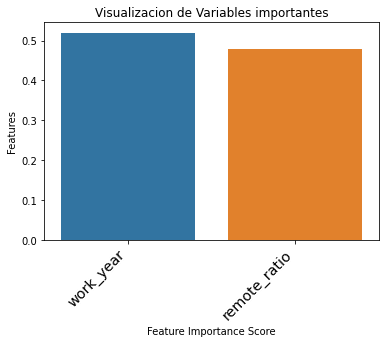

In [ ]:
#visualizarcaracterísticas importantes en un diagrama de barras

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizacion de Variables importantes")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
);

Si nos basamos en analisis anteriores podemos deducir que el salario está de una manera ligado al año de pago del salario y a la cantidad de trabajo remoto